In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt 



# GramFE parameters for extension of size 14
FLAG_SPECTRAL_ORDER = 14
FLAG_SPECTRAL_NDELTA = 14
FLAG_SPECTRAL_ND = 32


flag_spectral_polynomials = np.array([
[0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000],
[-0.4309458036856673168735198942158604040741920471191406250000000000, -0.3646464492724877382023862537607783451676368713378906250000000000, -0.2983470948593081595312526133056962862610816955566406250000000000, -0.2320477404461285531045433572217007167637348175048828125000000000, -0.1657483860329489744334097167666186578571796417236328125000000000, -0.0994490316197693818844882684970798436552286148071289062500000000, -0.0331496772065897962744607241347694071009755134582519531250000000, 0.0331496772065897962744607241347694071009755134582519531250000000, 0.0994490316197693818844882684970798436552286148071289062500000000, 0.1657483860329489744334097167666186578571796417236328125000000000, 0.2320477404461285531045433572217007167637348175048828125000000000, 0.2983470948593081595312526133056962862610816955566406250000000000, 0.3646464492724877382023862537607783451676368713378906250000000000, 0.4309458036856673168735198942158604040741920471191406250000000000],
[0.4818120558297157574045854744326788932085037231445312500000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.4818120558297157574045854744326788932085037231445312500000000000],
[-0.4585783658733355583336788185988552868366241455078125000000000000, -0.0352752589133335028859228543751669349148869514465332031250000000, 0.2116515534800010311933249340654583647847175598144531250000000000, 0.3142704885006075699038774473592638969421386718750000000000000000, 0.3046499633424257225122744330292334780097007751464843750000000000, 0.2148583951993949803238592721754685044288635253906250000000000000, 0.0769642012654549179107021927848109044134616851806640625000000000, -0.0769642012654549179107021927848109044134616851806640625000000000, -0.2148583951993949803238592721754685044288635253906250000000000000, -0.3046499633424257225122744330292334780097007751464843750000000000, -0.3142704885006075699038774473592638969421386718750000000000000000, -0.2116515534800010311933249340654583647847175598144531250000000000, 0.0352752589133335028859228543751669349148869514465332031250000000, 0.4585783658733355583336788185988552868366241455078125000000000000],
[0.3875694570442999031811837085115257650613784790039062500000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, 0.1707473831733629099360882719338405877351760864257812500000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.1707473831733629099360882719338405877351760864257812500000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, 0.3875694570442999031811837085115257650613784790039062500000000000],
[-0.2948961391092899120280890201684087514877319335937500000000000000, 0.3856334126813791285393051566643407568335533142089843750000000000, 0.2722118207162676495336484094877960160374641418457031250000000000, -0.0577419013640567690970328840194270014762878417968750000000000000, -0.2866472960572818418079066304926527664065361022949218750000000000, -0.2990205606352939748937558306352002546191215515136718750000000000, -0.1237326457801216500476115811579802539199590682983398437500000000, 0.1237326457801216500476115811579802539199590682983398437500000000, 0.2990205606352939748937558306352002546191215515136718750000000000, 0.2866472960572818418079066304926527664065361022949218750000000000, 0.0577419013640567690970328840194270014762878417968750000000000000, -0.2722118207162676495336484094877960160374641418457031250000000000, -0.3856334126813791285393051566643407568335533142089843750000000000, 0.2948961391092899120280890201684087514877319335937500000000000000],
[0.2027563273040598468277551091887289658188819885253906250000000000, -0.4523025762936719873508195632894057780504226684570312500000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, 0.3218579461400111196844875394162954762578010559082031250000000000, 0.2623071367220354832561213243025122210383415222167968750000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, 0.2623071367220354832561213243025122210383415222167968750000000000, 0.3218579461400111196844875394162954762578010559082031250000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, -0.4523025762936719873508195632894057780504226684570312500000000000, 0.2027563273040598468277551091887289658188819885253906250000000000],
[-0.1257441362172087295778766247167368419468402862548828125000000000, 0.4159229121030749709575502492953091859817504882812500000000000000, -0.2611608982972796755284150549414334818720817565917968750000000000, -0.3104033572354872316800822318327846005558967590332031250000000000, 0.0835363142701736199891016099172702524811029434204101562500000000, 0.3297486089612116644254058428487041965126991271972656250000000000, 0.1758659247793128987957800291042076423764228820800781250000000000, -0.1758659247793128987957800291042076423764228820800781250000000000, -0.3297486089612116644254058428487041965126991271972656250000000000, -0.0835363142701736199891016099172702524811029434204101562500000000, 0.3104033572354872316800822318327846005558967590332031250000000000, 0.2611608982972796755284150549414334818720817565917968750000000000, -0.4159229121030749709575502492953091859817504882812500000000000000, 0.1257441362172087295778766247167368419468402862548828125000000000],
[0.0699086407042275592704783093722653575241565704345703125000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.0699086407042275592704783093722653575241565704345703125000000000],
[-0.0344591278812576007339885109104216098785400390625000000000000000, 0.2041040651428334962158572807311429642140865325927734375000000000, -0.4320644495880761049022567021893337368965148925781250000000000000, 0.2836251294841972137028562883642734959721565246582031250000000000, 0.2359124908793789887617720069101778790354728698730468750000000000, -0.2783237251947729418155574876436730846762657165527343750000000000, -0.2385631930240910969498457916415645740926265716552734375000000000, 0.2385631930240910969498457916415645740926265716552734375000000000, 0.2783237251947729418155574876436730846762657165527343750000000000, -0.2359124908793789887617720069101778790354728698730468750000000000, -0.2836251294841972137028562883642734959721565246582031250000000000, 0.4320644495880761049022567021893337368965148925781250000000000000, -0.2041040651428334962158572807311429642140865325927734375000000000, 0.0344591278812576007339885109104216098785400390625000000000000000],
[0.0147897728358395794817647939112248423043638467788696289062500000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.0147897728358395794817647939112248423043638467788696289062500000],
[-0.0053617479838052716639706929413478064816445112228393554687500000, 0.0490806161594482537324779514165129512548446655273437500000000000, -0.1913731588065881450422267562316847033798694610595703125000000000, 0.3992440037171925415471207543305354192852973937988281250000000000, -0.4310020494674237645504888405412202700972557067871093750000000000, 0.0952741372506936690101042586320545524358749389648437500000000000, 0.3266541848595211350314571063790936022996902465820312500000000000, -0.3266541848595211350314571063790936022996902465820312500000000000, -0.0952741372506936690101042586320545524358749389648437500000000000, 0.4310020494674237645504888405412202700972557067871093750000000000, -0.3992440037171925415471207543305354192852973937988281250000000000, 0.1913731588065881450422267562316847033798694610595703125000000000, -0.0490806161594482537324779514165129512548446655273437500000000000, 0.0053617479838052716639706929413478064816445112228393554687500000],
[0.0015503894602372355823738381275234132772311568260192871093750000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0015503894602372355823738381275234132772311568260192871093750000],
[-0.0003100778920474471056327459006496383153717033565044403076171875, 0.0040310125966168128611166743269222934031859040260314941406250000, -0.0241860755797008754319765699847266660071909427642822265625000000, 0.0886822771255698777403964072618691716343164443969726562500000000, -0.2217056928139246874120971142474445514380931854248046875000000000, 0.3990702470650644428928899287711828947067260742187500000000000000, -0.5320936627534192941979540592001285403966903686523437500000000000, 0.5320936627534192941979540592001285403966903686523437500000000000, -0.3990702470650644428928899287711828947067260742187500000000000000, 0.2217056928139246874120971142474445514380931854248046875000000000, -0.0886822771255698777403964072618691716343164443969726562500000000, 0.0241860755797008754319765699847266660071909427642822265625000000, -0.0040310125966168128611166743269222934031859040260314941406250000, 0.0003100778920474471056327459006496383153717033565044403076171875],
])

def least_squares_regression(x, y, start, end):
    # Ensure x and y are numpy arrays for efficient computation
    x, y = np.asarray(x), np.asarray(y)

    # Calculate the number of points
    n = len(x[start:])
    
    # Summations needed for the formula
    sum_x = np.sum(x[start:])
    sum_y = np.sum(y[start:])
    sum_x_squared = np.sum(x[start:] ** 2)
    sum_xy = np.sum(x[start:] * y[start:])
    
    # Calculating the slope
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    
    # Calculating the intercept
    intercept = (sum_y - slope * sum_x) / n
    
    return slope, intercept



def prepare_for_spectral_criterion(var1d):
    # set the stride to a small value to sample the wave function evenly
    # 1, 2, 4 should all work, but higher values are faster
    stride = 1
    ghost_size = 1
    size_1d = 32
    max_order = 14

    re = np.real(var1d)
    im = np.imag(var1d)

    slope_max = -float('inf')

    # Generate all permutations of axes
    axes_permutations = [(0, 1, 2), (1, 0, 2), (2, 0, 1)]

    for axes in axes_permutations:
        # Transpose the array according to the current permutation
        transposed_re = np.transpose(re, axes=axes)
        transposed_im = np.transpose(im, axes=axes)
        for k in range(ghost_size, size_1d - ghost_size, stride):
            for j in range(ghost_size, size_1d - ghost_size, stride):
                row_re = transposed_re[:][k][j]
                row_im = transposed_im[:][k][j]
                row_de = row_re ** 2 + row_im ** 2

                al_re = np.zeros(max_order)
                al_im = np.zeros(max_order)
                al_de = np.zeros(max_order)
                ar_re = np.zeros(max_order)
                ar_im = np.zeros(max_order)
                ar_de = np.zeros(max_order)

                for i in range(max_order):
                    al_re[i] += flag_spectral_polynomials[i][:] @ row_re[:max_order]  # left boundary
                    al_im[i] += flag_spectral_polynomials[i][:] @ row_im[:max_order]  # left boundary
                    al_de[i] += flag_spectral_polynomials[i][:] @ row_de[:max_order]  # left boundary
                    ar_re[i] += flag_spectral_polynomials[i][:] @ row_re[size_1d - max_order:]  # right boundary
                    ar_im[i] += flag_spectral_polynomials[i][:] @ row_im[size_1d - max_order:]  # right boundary
                    ar_de[i] += flag_spectral_polynomials[i][:] @ row_de[size_1d - max_order:]  # right boundary

                order = np.arange(1, max_order+1)
                al_re_log = np.log(np.abs(al_re) + 1e-14)
                al_im_log = np.log(np.abs(al_im) + 1e-14)
                al_de_log = np.log(np.abs(al_de) + 1e-14)
                ar_re_log = np.log(np.abs(ar_re) + 1e-14)
                ar_im_log = np.log(np.abs(ar_im) + 1e-14)
                ar_de_log = np.log(np.abs(ar_de) + 1e-14)

                slope, _ = least_squares_regression(np.log(order), al_re_log, start = 5, end = -1)
                print(slope)
                slope_max = max(slope_max, slope)
                slope, _ = least_squares_regression(np.log(order), ar_re_log, start = 5, end = -1)
                slope_max = max(slope_max, slope)

    return slope_max

# Define parameters
PS2 = 16
GhostSize = 8
Size1D = PS2 + 2 * GhostSize
Stride = 1
MaxOrder = 14

# Generate Var1D data
X = np.linspace(0, 2 * np.pi, Size1D)
x, y, z = np.meshgrid(X, X, X)
wavelengths = np.arange(1, 32) 

slopes = [prepare_for_spectral_criterion(np.exp(1j* x * k)) for k in wavelengths]




0.008228442457525586
0.01088975686544004
-0.003576360360570395
0.0016925759174419462
-0.0043412674876330245
-0.0007089172533481777
0.0014129928280135296
0.0002319122972314492
0.0017594766267597529
-0.0021350550842969096
-0.006124734611496787
0.0075097537694738675
0.032838701351565885
0.0019541890010565466
0.01142883799718659
0.01142883799718659
0.0060034093776813995
0.01629497294390528
0.010555122546234322
0.006528972008315342
0.0062499887644531515
0.0020990419332681635
-0.00016265195467291221
0.00182643093233056
-0.0007089172533481777
-0.0043412674876330245
0.011907866867522808
-0.003576360360570395
0.01088975686544004
0.008228442457525586
0.008228442457525586
0.01088975686544004
-0.003576360360570395
0.0016925759174419462
-0.0043412674876330245
-0.0007089172533481777
0.0014129928280135296
0.0002319122972314492
0.0017594766267597529
-0.0021350550842969096
-0.006124734611496787
0.0075097537694738675
0.032838701351565885
0.0019541890010565466
0.01142883799718659
0.01142883799718659
0.00

[  0.57627355  -2.17168002  -3.04830858  -5.21720603  -9.05064062
 -18.58613682 -31.16683458 -35.1660158  -45.44331042 -49.91349844
 -48.24157428 -59.47284513 -54.50678146 -64.55696916]
[ -1.68647382  -2.03029525  -3.2251886   -4.92596757  -9.63631962
 -17.80409536 -30.98187528 -41.04431335 -50.00720155 -53.2481879
 -58.37326086 -64.99246597 -70.66039777 -73.99858387]
[  0.57950233  -1.84585246  -2.65773453  -4.56666092  -7.81425317
 -16.4149458  -29.26890579 -32.97201772 -44.20386338 -48.4971749
 -45.42258529 -57.85577706 -50.87250524 -61.78704691]
[  0.57008208  -2.11480276  -3.09550432  -5.09830902  -9.20383528
 -18.35351339 -29.72887009 -37.10658691 -41.23943631 -46.12809845
 -50.8784308  -56.4422297  -59.64884076 -60.43412643]
[ -1.63441677  -2.06831831  -3.15357127  -5.00291293  -9.39720474
 -18.05848517 -30.65382677 -41.06926183 -49.22101793 -56.92584622
 -58.14571796 -63.39882023 -68.88123624 -74.27454181]
[  0.56712355  -1.7901927   -2.70194124  -4.46261364  -7.9475814
 -16.18

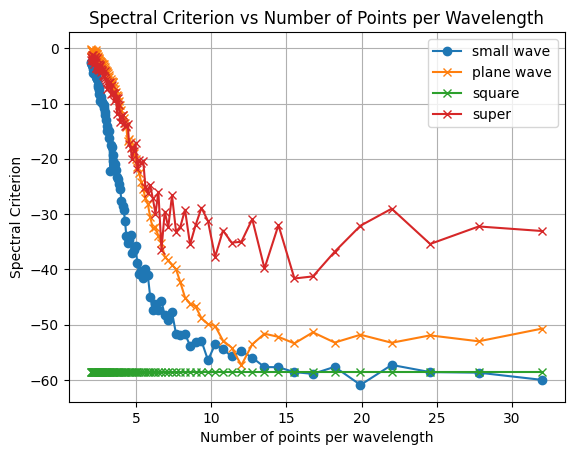

In [122]:
import numpy as np
import cmath
import matplotlib.pyplot as plt 



# GramFE parameters for extension of size 14
FLAG_SPECTRAL_ORDER = 14
FLAG_SPECTRAL_NDELTA = 14
FLAG_SPECTRAL_ND = 32


flag_spectral_polynomials = np.array([
[0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000, 0.2672612419124243965384835064469370990991592407226562500000000000],
[-0.4309458036856673168735198942158604040741920471191406250000000000, -0.3646464492724877382023862537607783451676368713378906250000000000, -0.2983470948593081595312526133056962862610816955566406250000000000, -0.2320477404461285531045433572217007167637348175048828125000000000, -0.1657483860329489744334097167666186578571796417236328125000000000, -0.0994490316197693818844882684970798436552286148071289062500000000, -0.0331496772065897962744607241347694071009755134582519531250000000, 0.0331496772065897962744607241347694071009755134582519531250000000, 0.0994490316197693818844882684970798436552286148071289062500000000, 0.1657483860329489744334097167666186578571796417236328125000000000, 0.2320477404461285531045433572217007167637348175048828125000000000, 0.2983470948593081595312526133056962862610816955566406250000000000, 0.3646464492724877382023862537607783451676368713378906250000000000, 0.4309458036856673168735198942158604040741920471191406250000000000],
[0.4818120558297157574045854744326788932085037231445312500000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2964997266644404660951295227278023958206176757812500000000000000, -0.2594372608313854078332383323868270963430404663085937500000000000, -0.1853123291652752913094559517048764973878860473632812500000000000, -0.0741249316661101165237823806819505989551544189453125000000000000, 0.0741249316661101165237823806819505989551544189453125000000000000, 0.2594372608313854078332383323868270963430404663085937500000000000, 0.4818120558297157574045854744326788932085037231445312500000000000],
[-0.4585783658733355583336788185988552868366241455078125000000000000, -0.0352752589133335028859228543751669349148869514465332031250000000, 0.2116515534800010311933249340654583647847175598144531250000000000, 0.3142704885006075699038774473592638969421386718750000000000000000, 0.3046499633424257225122744330292334780097007751464843750000000000, 0.2148583951993949803238592721754685044288635253906250000000000000, 0.0769642012654549179107021927848109044134616851806640625000000000, -0.0769642012654549179107021927848109044134616851806640625000000000, -0.2148583951993949803238592721754685044288635253906250000000000000, -0.3046499633424257225122744330292334780097007751464843750000000000, -0.3142704885006075699038774473592638969421386718750000000000000000, -0.2116515534800010311933249340654583647847175598144531250000000000, 0.0352752589133335028859228543751669349148869514465332031250000000, 0.4585783658733355583336788185988552868366241455078125000000000000],
[0.3875694570442999031811837085115257650613784790039062500000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, 0.1707473831733629099360882719338405877351760864257812500000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.2927097997257649963920300706377020105719566345214843750000000000, 0.1707473831733629099360882719338405877351760864257812500000000000, -0.0352335870040272683412219123511022189632058143615722656250000000, -0.2493453849515775699874353676932514645159244537353515625000000000, -0.3577564218870460943655587016110075637698173522949218750000000000, -0.2086912461007768837539799733349354937672615051269531250000000000, 0.3875694570442999031811837085115257650613784790039062500000000000],
[-0.2948961391092899120280890201684087514877319335937500000000000000, 0.3856334126813791285393051566643407568335533142089843750000000000, 0.2722118207162676495336484094877960160374641418457031250000000000, -0.0577419013640567690970328840194270014762878417968750000000000000, -0.2866472960572818418079066304926527664065361022949218750000000000, -0.2990205606352939748937558306352002546191215515136718750000000000, -0.1237326457801216500476115811579802539199590682983398437500000000, 0.1237326457801216500476115811579802539199590682983398437500000000, 0.2990205606352939748937558306352002546191215515136718750000000000, 0.2866472960572818418079066304926527664065361022949218750000000000, 0.0577419013640567690970328840194270014762878417968750000000000000, -0.2722118207162676495336484094877960160374641418457031250000000000, -0.3856334126813791285393051566643407568335533142089843750000000000, 0.2948961391092899120280890201684087514877319335937500000000000000],
[0.2027563273040598468277551091887289658188819885253906250000000000, -0.4523025762936719873508195632894057780504226684570312500000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, 0.3218579461400111196844875394162954762578010559082031250000000000, 0.2623071367220354832561213243025122210383415222167968750000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.2835752829427410359741656975529622286558151245117187500000000000, -0.0354469103678426294967707121941202785819768905639648437500000000, 0.2623071367220354832561213243025122210383415222167968750000000000, 0.3218579461400111196844875394162954762578010559082031250000000000, -0.0155966405618507587826915283812923007644712924957275390625000000, -0.4523025762936719873508195632894057780504226684570312500000000000, 0.2027563273040598468277551091887289658188819885253906250000000000],
[-0.1257441362172087295778766247167368419468402862548828125000000000, 0.4159229121030749709575502492953091859817504882812500000000000000, -0.2611608982972796755284150549414334818720817565917968750000000000, -0.3104033572354872316800822318327846005558967590332031250000000000, 0.0835363142701736199891016099172702524811029434204101562500000000, 0.3297486089612116644254058428487041965126991271972656250000000000, 0.1758659247793128987957800291042076423764228820800781250000000000, -0.1758659247793128987957800291042076423764228820800781250000000000, -0.3297486089612116644254058428487041965126991271972656250000000000, -0.0835363142701736199891016099172702524811029434204101562500000000, 0.3104033572354872316800822318327846005558967590332031250000000000, 0.2611608982972796755284150549414334818720817565917968750000000000, -0.4159229121030749709575502492953091859817504882812500000000000000, 0.1257441362172087295778766247167368419468402862548828125000000000],
[0.0699086407042275592704783093722653575241565704345703125000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, 0.2688793873239521681206554148957366123795509338378906250000000000, -0.1344396936619760840603277074478683061897754669189453125000000000, -0.3495432035211377685968159312324132770299911499023437500000000000, 0.0376431142253532968755536103344638831913471221923828125000000000, 0.4248294319718443623479231519013410434126853942871093750000000000, -0.3172776770422635062018912321946118026971817016601562500000000000, 0.0699086407042275592704783093722653575241565704345703125000000000],
[-0.0344591278812576007339885109104216098785400390625000000000000000, 0.2041040651428334962158572807311429642140865325927734375000000000, -0.4320644495880761049022567021893337368965148925781250000000000000, 0.2836251294841972137028562883642734959721565246582031250000000000, 0.2359124908793789887617720069101778790354728698730468750000000000, -0.2783237251947729418155574876436730846762657165527343750000000000, -0.2385631930240910969498457916415645740926265716552734375000000000, 0.2385631930240910969498457916415645740926265716552734375000000000, 0.2783237251947729418155574876436730846762657165527343750000000000, -0.2359124908793789887617720069101778790354728698730468750000000000, -0.2836251294841972137028562883642734959721565246582031250000000000, 0.4320644495880761049022567021893337368965148925781250000000000000, -0.2041040651428334962158572807311429642140865325927734375000000000, 0.0344591278812576007339885109104216098785400390625000000000000000],
[0.0147897728358395794817647939112248423043638467788696289062500000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, -0.2457377640416422426294928982315468601882457733154296875000000000, 0.3174112785537879233288549585267901420593261718750000000000000000, 0.1422093541907651914613097687833942472934722900390625000000000000, -0.4459685347422396306527048182033468037843704223632812500000000000, 0.3276503520555230086763742747280048206448554992675781250000000000, -0.1103544588520337932369130840015714056789875030517578125000000000, 0.0147897728358395794817647939112248423043638467788696289062500000],
[-0.0053617479838052716639706929413478064816445112228393554687500000, 0.0490806161594482537324779514165129512548446655273437500000000000, -0.1913731588065881450422267562316847033798694610595703125000000000, 0.3992440037171925415471207543305354192852973937988281250000000000, -0.4310020494674237645504888405412202700972557067871093750000000000, 0.0952741372506936690101042586320545524358749389648437500000000000, 0.3266541848595211350314571063790936022996902465820312500000000000, -0.3266541848595211350314571063790936022996902465820312500000000000, -0.0952741372506936690101042586320545524358749389648437500000000000, 0.4310020494674237645504888405412202700972557067871093750000000000, -0.3992440037171925415471207543305354192852973937988281250000000000, 0.1913731588065881450422267562316847033798694610595703125000000000, -0.0490806161594482537324779514165129512548446655273437500000000000, 0.0053617479838052716639706929413478064816445112228393554687500000],
[0.0015503894602372355823738381275234132772311568260192871093750000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, 0.2046514087513151003427935847867047414183616638183593750000000000, -0.4604656696904589896490733735845424234867095947265625000000000000, 0.4263571015652398155104663146630628034472465515136718750000000000, -0.2387599768765342744814006437081843614578247070312500000000000000, 0.0837210308528107266523576868166856002062559127807617187500000000, -0.0170542840626095905387504814143539988435804843902587890625000000, 0.0015503894602372355823738381275234132772311568260192871093750000],
[-0.0003100778920474471056327459006496383153717033565044403076171875, 0.0040310125966168128611166743269222934031859040260314941406250000, -0.0241860755797008754319765699847266660071909427642822265625000000, 0.0886822771255698777403964072618691716343164443969726562500000000, -0.2217056928139246874120971142474445514380931854248046875000000000, 0.3990702470650644428928899287711828947067260742187500000000000000, -0.5320936627534192941979540592001285403966903686523437500000000000, 0.5320936627534192941979540592001285403966903686523437500000000000, -0.3990702470650644428928899287711828947067260742187500000000000000, 0.2217056928139246874120971142474445514380931854248046875000000000, -0.0886822771255698777403964072618691716343164443969726562500000000, 0.0241860755797008754319765699847266660071909427642822265625000000, -0.0040310125966168128611166743269222934031859040260314941406250000, 0.0003100778920474471056327459006496383153717033565044403076171875],
])

def least_squares_regression(x, y, start, end):
    # Ensure x and y are numpy arrays for efficient computation
    x, y = np.asarray(x), np.asarray(y)

    # Calculate the number of points
    n = len(x[start:end])
    
    # Summations needed for the formula
    sum_x = np.sum(x[start:end])
    sum_y = np.sum(y[start:end])
    sum_x_squared = np.sum(x[start:end] ** 2)
    sum_xy = np.sum(x[start:end] * y[start:end])
    
    # Calculating the slope
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    
    # Calculating the intercept
    intercept = (sum_y - slope * sum_x) / n
    
    return slope, intercept



def prepare_for_spectral_criterion(var1d, start, end):
    # set the stride to a small value to sample the wave function evenly
    # 1, 2, 4 should all work, but higher values are faster
    stride = 1
    ghost_size = 8
    size_1d = 32
    max_order = 14

    row_re = np.real(var1d)
    row_im = np.imag(var1d)

    slope_max = -float('inf')

    row_de = row_re ** 2 + row_im ** 2

    al_re = np.zeros(max_order)
    al_im = np.zeros(max_order)
    al_de = np.zeros(max_order)
    ar_re = np.zeros(max_order)
    ar_im = np.zeros(max_order)
    ar_de = np.zeros(max_order)

    for i in range(max_order):
        al_re[i] += flag_spectral_polynomials[i][:] @ row_re[:max_order]  # left boundary
        al_im[i] += flag_spectral_polynomials[i][:] @ row_im[:max_order]  # left boundary
        al_de[i] += flag_spectral_polynomials[i][:] @ row_de[:max_order]  # left boundary
        ar_re[i] += flag_spectral_polynomials[i][:] @ row_re[size_1d - max_order:]  # right boundary
        ar_im[i] += flag_spectral_polynomials[i][:] @ row_im[size_1d - max_order:]  # right boundary
        ar_de[i] += flag_spectral_polynomials[i][:] @ row_de[size_1d - max_order:]  # right boundary

    order = np.log10(np.arange(1, max_order+1))

    ars = [al_re, al_im, al_de, ar_re, ar_im, ar_de]
    arl = [np.log10(np.abs(a) + 1e-16) for a in ars]

    for a in arl: 
        a = a - 1/(1 + np.exp(1*(a+6))) * 5 * np.arange(0, max_order)
        print(a)
        slope, _ = least_squares_regression(order, a, start = start, end = end)
        slope_max = max(slope_max, slope)
    return slope_max

    
# Define parameters
PS2 = 16
GhostSize = 8
Size1D = PS2 + 2 * GhostSize
Stride = 1
MaxOrder = 14

# Generate Var1D data
x = np.linspace(0, np.pi, 33)[:-1]
ks = np.linspace(1, 16, 100) 


# Function to generate the complex wave function based on the Schrödinger equation
def f1(x, k, time = 0.5):
    # Given parameters
    VorPairLin_BgAmp = 0.5
    VorPairLin_WaveAmp = -1.0
    VorPairLin_Phase0 = 0.0
    VorPairLin_Omega = 0.5  # Simplified for demonstration

    phase = k * x - VorPairLin_Omega * time + VorPairLin_Phase0
    amp = VorPairLin_WaveAmp
    Re = VorPairLin_BgAmp + amp * np.cos(phase)
    Im = amp * np.sin(phase) + np.cos(phase *2)
    return Re + 1j * Im


def f1(x, k):
    return np.arange(len(x))**0 + 0.01 * np.exp(1j * x * k) 
def f2(x, k):
    return np.exp(1j * x * k) 
def f3(x, k):
    return np.arange(len(x))**2

def f4(x, k_max):
    y = np.zeros(x.shape, dtype=np.complex128)  # Initialize the output array
    
    for k in np.linspace(0, k_max, 20):
        # Generate random coefficients between 0 and 1
        coeff = np.random.rand()
        
        # Add the contribution of the plane wave with coefficient 'coeff' and wavevector 'k'
        y += coeff * np.exp(1j * x * k)
    
    return y

slopes1 = [prepare_for_spectral_criterion(f1(x, k).astype(np.csingle).astype(np.cdouble), 0, 14) for k in ks]
slopes2 = [prepare_for_spectral_criterion(f2(x, k).astype(np.csingle).astype(np.cdouble), 0, 14) for k in ks]
slopes3 = [prepare_for_spectral_criterion(f3(x, k).astype(np.csingle).astype(np.cdouble), 0, 14) for k in ks]
slopes4 = [prepare_for_spectral_criterion(f4(x, k).astype(np.csingle).astype(np.cdouble), 0, 14) for k in ks]



# Plot
plt.figure()
plt.plot(32/ks, slopes1, marker='o', linestyle='-', label="small wave")
plt.plot(32/ks, slopes2, marker='x', linestyle='-', label="plane wave")
plt.plot(32/ks, slopes3, marker='x', linestyle='-' ,label="square")
plt.plot(32/ks, slopes4, marker='x', linestyle='-', label="super")
plt.xlabel('Number of points per wavelength')
plt.ylabel('Spectral Criterion')
plt.title('Spectral Criterion vs Number of Points per Wavelength')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
x = np.arange(10)
np.argwhere(x > 6)

array([[7],
       [8],
       [9]])

-7.755799433794687 14.713682016092024


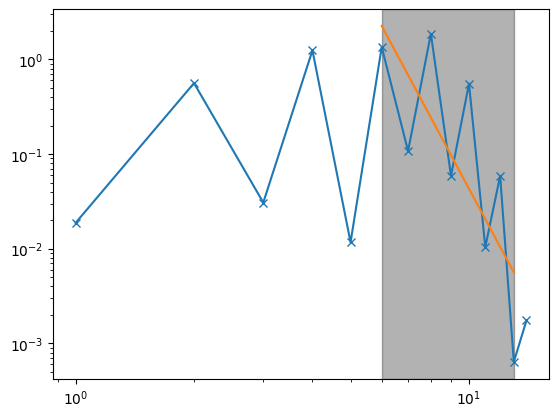

In [94]:

def least_squares_regression(x, y, start, end):
    # Ensure x and y are numpy arrays for efficient computation
    x, y = np.asarray(x), np.asarray(y)

    # Calculate the number of points
    n = len(x[start:])
    
    # Summations needed for the formula
    sum_x = np.sum(x[start:])
    sum_y = np.sum(y[start:])
    sum_x_squared = np.sum(x[start:] ** 2)
    sum_xy = np.sum(x[start:] * y[start:])
    
    # Calculating the slope
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    
    # Calculating the intercept
    intercept = (sum_y - slope * sum_x) / n
    
    return slope, intercept


# Generate Var1D data
x = np.linspace(0, 2 * np.pi, Size1D)

y =  np.exp(1j * x * 6) 

max_order = 14 
size_1d = 32

row_re = np.real(y) 
row_im = np.imag(y) 


al_re = np.zeros(max_order)
al_im = np.zeros(max_order)
al_de = np.zeros(max_order)
ar_re = np.zeros(max_order)
ar_im = np.zeros(max_order)
ar_de = np.zeros(max_order)

for i in range(max_order):
    for t in range(max_order):
        al_re[i] += flag_spectral_polynomials[i][t] * row_re[t]  # left boundary
        al_im[i] += flag_spectral_polynomials[i][t] * row_im[t]  # left boundary
        ar_re[i] += flag_spectral_polynomials[i][t] * row_re[size_1d - max_order + t]  # right boundary
        ar_im[i] += flag_spectral_polynomials[i][t] * row_im[size_1d - max_order + t]  # right boundary

order     = np.arange(1, max_order+1)
al_re_log = np.log(np.abs(al_re) + 1e-14)
al_im_log = np.log(np.abs(al_im) + 1e-14)
al_de_log = np.log(np.abs(al_de) + 1e-14)
ar_re_log = np.log(np.abs(ar_re) + 1e-14)
ar_im_log = np.log(np.abs(ar_im) + 1e-14)
ar_de_log = np.log(np.abs(ar_de) + 1e-14)

# Define the linear model function
def linear_model(x, m, b):
    return m * x + b

#al_re_log = np.log((order*1.0)**-2)
start =  5
end   = -1
slope, intercept = least_squares_regression(np.log(order), al_re_log, start = start, end = end)
print(slope, intercept)

#from scipy.optimize import curve_fit
#params, cov = curve_fit(linear_model, np.log(order[start:end]), al_re_log[start:end])
#
## Extract the slope (m) and intercept (b) from the fitted parameters
#slope, intercept = params
#print(slope, intercept)

plt.xscale("log")
plt.yscale("log")
plt.axvspan(order[start], order[end-1], color="k", alpha=0.3)
plt.plot(order, np.abs(al_re), marker="x")
#plt.plot(np.abs(ar_re), marker="x")
#plt.plot(np.abs(al_im), marker="x")
#plt.plot(np.abs(ar_im), marker="x")
plt.plot(order[start:end], np.exp(intercept) * order[start:end]**slope)
plt.show() 
